In [84]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [19]:
etf = pd.read_csv('ETF prices.csv', parse_dates=True, infer_datetime_format=True, index_col= 'price_date')

In [10]:
etf_df.drop(columns=['open', 'high', 'low', 'close', 'volume'], inplace=True)

In [64]:
etf_df.reset_index(inplace=True)

In [57]:
#etf_df.pivot(index ='fund_symbol', columns ='price_date')

In [58]:
#etf_df['fund_symbol'].nunique()

In [62]:
AAA_df = etf_df[etf_df["fund_symbol"]== "AAA"].drop(columns = "fund_symbol").pct_change()

In [65]:
etf_df["price_date"] = pd.to_datetime(etf_df["price_date"])

In [66]:
etf_df.dtypes

price_date     datetime64[ns]
fund_symbol            object
adj_close             float64
dtype: object

In [68]:
etf_2016 = etf_df.loc[etf_df['price_date'] >= "2016"]

In [70]:
etf_pivot = etf_2016.pivot_table(index = ["price_date"], columns = "fund_symbol", values = "adj_close")

In [75]:
etf_pivot.fillna()

fund_symbol,AAA,AAAU,AADR,AAXJ,ABEQ,ACES,ACIO,ACSI,ACTV,ACVF,...,YMAR,YOLO,YPS,YXI,YYY,ZHDG,ZIG,ZIVZF,ZROZ,ZSL
price_date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,36.49,47.28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.76,10.55,NaN,NaN,40.34,98.33,256.36
2016-01-05,NaN,NaN,36.49,47.37,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.85,10.63,NaN,NaN,40.99,97.53,252.00
2016-01-06,NaN,NaN,35.94,46.45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.47,10.64,NaN,NaN,40.60,99.53,251.00
2016-01-07,NaN,NaN,35.94,45.16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31.71,10.49,NaN,NaN,38.99,99.57,240.96
2016-01-08,NaN,NaN,35.94,44.78,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.06,10.43,NaN,NaN,37.80,100.10,251.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,25.03,17.80,63.53,86.02,28.00,76.64,32.03,53.44,38.14,34.99,...,20.87,15.09,24.40,15.66,16.81,20.95,30.32,31.03,147.73,26.35
2021-11-24,25.02,17.78,63.13,85.94,27.93,76.96,32.05,52.92,38.25,35.13,...,20.75,15.56,24.35,15.62,16.81,20.92,30.32,31.03,151.03,26.69
2021-11-26,25.02,17.75,61.47,83.39,27.61,74.47,31.46,51.71,37.01,34.41,...,20.34,15.27,23.64,16.03,16.55,20.63,30.10,29.03,155.66,27.72


In [76]:
for col in etf_pivot:
    if col.startswith('NaN'):
        etf_pivot[col].fillna(0, inplace=True)
        etf_pivot[col] = etf_pivot[col].map(lambda x: re.sub("\D","",str(x)))

In [77]:
etf_pivot

fund_symbol,AAA,AAAU,AADR,AAXJ,ABEQ,ACES,ACIO,ACSI,ACTV,ACVF,...,YMAR,YOLO,YPS,YXI,YYY,ZHDG,ZIG,ZIVZF,ZROZ,ZSL
price_date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,36.49,47.28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.76,10.55,NaN,NaN,40.34,98.33,256.36
2016-01-05,NaN,NaN,36.49,47.37,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.85,10.63,NaN,NaN,40.99,97.53,252.00
2016-01-06,NaN,NaN,35.94,46.45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.47,10.64,NaN,NaN,40.60,99.53,251.00
2016-01-07,NaN,NaN,35.94,45.16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31.71,10.49,NaN,NaN,38.99,99.57,240.96
2016-01-08,NaN,NaN,35.94,44.78,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.06,10.43,NaN,NaN,37.80,100.10,251.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,25.03,17.80,63.53,86.02,28.00,76.64,32.03,53.44,38.14,34.99,...,20.87,15.09,24.40,15.66,16.81,20.95,30.32,31.03,147.73,26.35
2021-11-24,25.02,17.78,63.13,85.94,27.93,76.96,32.05,52.92,38.25,35.13,...,20.75,15.56,24.35,15.62,16.81,20.92,30.32,31.03,151.03,26.69
2021-11-26,25.02,17.75,61.47,83.39,27.61,74.47,31.46,51.71,37.01,34.41,...,20.34,15.27,23.64,16.03,16.55,20.63,30.10,29.03,155.66,27.72


In [78]:
etfs = etf_pivot.fillna(0)

In [79]:
etfs

fund_symbol,AAA,AAAU,AADR,AAXJ,ABEQ,ACES,ACIO,ACSI,ACTV,ACVF,...,YMAR,YOLO,YPS,YXI,YYY,ZHDG,ZIG,ZIVZF,ZROZ,ZSL
price_date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,0.00,0.00,36.49,47.28,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,29.76,10.55,0.00,0.00,40.34,98.33,256.36
2016-01-05,0.00,0.00,36.49,47.37,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,29.85,10.63,0.00,0.00,40.99,97.53,252.00
2016-01-06,0.00,0.00,35.94,46.45,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,30.47,10.64,0.00,0.00,40.60,99.53,251.00
2016-01-07,0.00,0.00,35.94,45.16,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,31.71,10.49,0.00,0.00,38.99,99.57,240.96
2016-01-08,0.00,0.00,35.94,44.78,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,32.06,10.43,0.00,0.00,37.80,100.10,251.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,25.03,17.80,63.53,86.02,28.00,76.64,32.03,53.44,38.14,34.99,...,20.87,15.09,24.40,15.66,16.81,20.95,30.32,31.03,147.73,26.35
2021-11-24,25.02,17.78,63.13,85.94,27.93,76.96,32.05,52.92,38.25,35.13,...,20.75,15.56,24.35,15.62,16.81,20.92,30.32,31.03,151.03,26.69
2021-11-26,25.02,17.75,61.47,83.39,27.61,74.47,31.46,51.71,37.01,34.41,...,20.34,15.27,23.64,16.03,16.55,20.63,30.10,29.03,155.66,27.72


In [80]:
etf_pivot_df = etf_pivot.dropna(axis='columns')

In [81]:
etf_pivot_df

fund_symbol,AADR,AAXJ,ACWF,ACWI,ACWV,ACWX,ADRE,AFK,AFTY,AGGY,...,YANG,YCL,YCS,YINN,YLD,YXI,YYY,ZIVZF,ZROZ,ZSL
price_date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,36.49,47.28,20.41,49.05,60.44,33.70,25.78,14.96,11.27,41.24,...,266.45,55.60,86.80,15.28,10.64,29.76,10.55,40.34,98.33,256.36
2016-01-05,36.49,47.37,20.18,49.10,60.80,33.66,25.87,14.87,11.53,41.24,...,270.22,55.83,86.19,15.04,10.68,29.85,10.63,40.99,97.53,252.00
2016-01-06,35.94,46.45,20.18,48.35,60.33,33.04,25.44,14.74,11.45,41.43,...,287.74,56.39,85.39,14.07,10.63,30.47,10.64,40.60,99.53,251.00
2016-01-07,35.94,45.16,19.80,47.23,59.69,32.29,24.54,14.27,10.83,41.43,...,321.11,57.16,84.10,12.44,10.63,31.71,10.49,38.99,99.57,240.96
2016-01-08,35.94,44.78,19.67,46.68,59.03,31.95,24.26,14.20,10.94,41.43,...,330.48,57.26,83.98,12.07,10.45,32.06,10.43,37.80,100.10,251.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,63.53,86.02,38.59,105.91,106.55,56.62,48.52,20.86,21.02,51.35,...,17.09,47.39,83.21,10.60,20.72,15.66,16.81,31.03,147.73,26.35
2021-11-24,63.13,85.94,38.59,105.95,106.31,56.39,48.87,20.73,21.15,51.39,...,16.95,47.18,83.59,10.69,20.73,15.62,16.81,31.03,151.03,26.69
2021-11-26,61.47,83.39,37.75,103.37,104.78,54.80,47.38,20.08,20.72,51.76,...,18.38,49.00,80.18,9.80,20.61,16.03,16.55,29.03,155.66,27.72


In [83]:
etf_pivot_df.pct_change().dropna()

fund_symbol,AADR,AAXJ,ACWF,ACWI,ACWV,ACWX,ADRE,AFK,AFTY,AGGY,...,YANG,YCL,YCS,YINN,YLD,YXI,YYY,ZIVZF,ZROZ,ZSL
price_date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,0.000000,0.001904,-0.011269,0.001019,0.005956,-0.001187,0.003491,-0.006016,0.023070,0.000000,...,0.014149,0.004137,-0.007028,-0.015707,0.003759,0.003024,0.007583,0.016113,-0.008136,-0.017007
2016-01-06,-0.015073,-0.019422,0.000000,-0.015275,-0.007730,-0.018419,-0.016622,-0.008742,-0.006938,0.004607,...,0.064836,0.010030,-0.009282,-0.064495,-0.004682,0.020771,0.000941,-0.009515,0.020507,-0.003968
2016-01-07,0.000000,-0.027772,-0.018831,-0.023164,-0.010608,-0.022700,-0.035377,-0.031886,-0.054148,0.000000,...,0.115973,0.013655,-0.015107,-0.115849,0.000000,0.040696,-0.014098,-0.039655,0.000402,-0.040000
2016-01-08,0.000000,-0.008415,-0.006566,-0.011645,-0.011057,-0.010530,-0.011410,-0.004905,0.010157,0.000000,...,0.029180,0.001749,-0.001427,-0.029743,-0.016933,0.011038,-0.005720,-0.030521,0.005323,0.044821
2016-01-11,-0.042293,0.000670,-0.031520,0.001071,0.001186,0.000939,-0.003710,-0.025352,-0.013711,0.000724,...,0.019850,-0.003144,0.003810,-0.019056,-0.006699,0.002495,-0.015340,-0.010317,-0.018382,0.016365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,-0.004388,-0.003013,-0.000777,-0.000283,0.001128,-0.000530,-0.008379,-0.002868,-0.002846,-0.004266,...,0.014846,-0.005039,0.004830,-0.013035,-0.003846,0.006427,-0.004147,0.000000,-0.019252,0.040679
2021-11-24,-0.006296,-0.000930,0.000000,0.000378,-0.002252,-0.004062,0.007214,-0.006232,0.006185,0.000779,...,-0.008192,-0.004431,0.004567,0.008491,0.000483,-0.002554,0.000000,0.000000,0.022338,0.012903
2021-11-26,-0.026295,-0.029672,-0.021767,-0.024351,-0.014392,-0.028196,-0.030489,-0.031356,-0.020331,0.007200,...,0.084366,0.038576,-0.040794,-0.083255,-0.005789,0.026248,-0.015467,-0.064454,0.030656,0.038591


In [89]:
tnx_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-07-28,2.962,2.966,2.933,2.951,2.951,0.0
2011-07-29,2.920,2.920,2.805,2.805,2.805,0.0
2011-07-31,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,2.792,2.821,2.719,2.740,2.740,0.0
2011-08-02,2.686,2.724,2.604,2.624,2.624,0.0
...,...,...,...,...,...,...
2022-07-22,2.809,2.823,2.732,2.783,2.783,0.0
2022-07-24,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-25,2.814,2.845,2.801,2.820,2.820,0.0


In [88]:
tnx_df = pd.read_csv("^TNX.csv", parse_dates=True, infer_datetime_format=True, index_col="Date")

In [91]:
tnx_df.drop(columns=['Open', "High", "Low", "Close", "Volume"], inplace=True)

In [92]:
tnx_df

,Adj Close
Date,
2011-07-28,2.951
2011-07-29,2.805
2011-07-31,NaN
2011-08-01,2.740
2011-08-02,2.624
...,...
2022-07-22,2.783
2022-07-24,NaN
2022-07-25,2.820


In [93]:
tnx_etf = pd.concat([tnx_df, etf_pivot_df], join = "inner", axis = 1)

In [97]:
tnx_etf.rename(columns= {"Adj Close": "TNX"}, inplace= True)

In [100]:
tnx_etf_returns = tnx_etf.pct_change()

In [102]:
tnx_etf_returns.dropna(inplace=True)

In [103]:
tnx_etf_returns

,TNX,AADR,AAXJ,ACWF,ACWI,ACWV,ACWX,ADRE,AFK,AFTY,...,YANG,YCL,YCS,YINN,YLD,YXI,YYY,ZIVZF,ZROZ,ZSL
2016-01-05,0.001336,0.000000,0.001904,-0.011269,0.001019,0.005956,-0.001187,0.003491,-0.006016,0.023070,...,0.014149,0.004137,-0.007028,-0.015707,0.003759,0.003024,0.007583,0.016113,-0.008136,-0.017007
2016-01-06,-0.031584,-0.015073,-0.019422,0.000000,-0.015275,-0.007730,-0.018419,-0.016622,-0.008742,-0.006938,...,0.064836,0.010030,-0.009282,-0.064495,-0.004682,0.020771,0.000941,-0.009515,0.020507,-0.003968
2016-01-07,-0.011024,0.000000,-0.027772,-0.018831,-0.023164,-0.010608,-0.022700,-0.035377,-0.031886,-0.054148,...,0.115973,0.013655,-0.015107,-0.115849,0.000000,0.040696,-0.014098,-0.039655,0.000402,-0.040000
2016-01-08,-0.010683,0.000000,-0.008415,-0.006566,-0.011645,-0.011057,-0.010530,-0.011410,-0.004905,0.010157,...,0.029180,0.001749,-0.001427,-0.029743,-0.016933,0.011038,-0.005720,-0.030521,0.005323,0.044821
2016-01-11,0.013146,-0.042293,0.000670,-0.031520,0.001071,0.001186,0.000939,-0.003710,-0.025352,-0.013711,...,0.019850,-0.003144,0.003810,-0.019056,-0.006699,0.002495,-0.015340,-0.010317,-0.018382,0.016365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,0.025846,-0.004388,-0.003013,-0.000777,-0.000283,0.001128,-0.000530,-0.008379,-0.002868,-0.002846,...,0.014846,-0.005039,0.004830,-0.013035,-0.003846,0.006427,-0.004147,0.000000,-0.019252,0.040679
2021-11-24,-0.013197,-0.006296,-0.000930,0.000000,0.000378,-0.002252,-0.004062,0.007214,-0.006232,0.006185,...,-0.008192,-0.004431,0.004567,0.008491,0.000483,-0.002554,0.000000,0.000000,0.022338,0.012903
2021-11-26,-0.099088,-0.026295,-0.029672,-0.021767,-0.024351,-0.014392,-0.028196,-0.030489,-0.031356,-0.020331,...,0.084366,0.038576,-0.040794,-0.083255,-0.005789,0.026248,-0.015467,-0.064454,0.030656,0.038591
2021-11-29,0.032389,0.013665,0.001559,0.007682,0.008997,0.005631,0.004562,0.003166,0.014442,0.004826,...,0.027203,-0.008163,0.009603,-0.028571,0.001941,0.009357,0.002417,0.085084,-0.006296,0.019841


In [107]:
etf_pivot_return = etf_pivot_df.pct_change().dropna()

In [108]:
etf_pivot_return

fund_symbol,AADR,AAXJ,ACWF,ACWI,ACWV,ACWX,ADRE,AFK,AFTY,AGGY,...,YANG,YCL,YCS,YINN,YLD,YXI,YYY,ZIVZF,ZROZ,ZSL
price_date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,0.000000,0.001904,-0.011269,0.001019,0.005956,-0.001187,0.003491,-0.006016,0.023070,0.000000,...,0.014149,0.004137,-0.007028,-0.015707,0.003759,0.003024,0.007583,0.016113,-0.008136,-0.017007
2016-01-06,-0.015073,-0.019422,0.000000,-0.015275,-0.007730,-0.018419,-0.016622,-0.008742,-0.006938,0.004607,...,0.064836,0.010030,-0.009282,-0.064495,-0.004682,0.020771,0.000941,-0.009515,0.020507,-0.003968
2016-01-07,0.000000,-0.027772,-0.018831,-0.023164,-0.010608,-0.022700,-0.035377,-0.031886,-0.054148,0.000000,...,0.115973,0.013655,-0.015107,-0.115849,0.000000,0.040696,-0.014098,-0.039655,0.000402,-0.040000
2016-01-08,0.000000,-0.008415,-0.006566,-0.011645,-0.011057,-0.010530,-0.011410,-0.004905,0.010157,0.000000,...,0.029180,0.001749,-0.001427,-0.029743,-0.016933,0.011038,-0.005720,-0.030521,0.005323,0.044821
2016-01-11,-0.042293,0.000670,-0.031520,0.001071,0.001186,0.000939,-0.003710,-0.025352,-0.013711,0.000724,...,0.019850,-0.003144,0.003810,-0.019056,-0.006699,0.002495,-0.015340,-0.010317,-0.018382,0.016365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,-0.004388,-0.003013,-0.000777,-0.000283,0.001128,-0.000530,-0.008379,-0.002868,-0.002846,-0.004266,...,0.014846,-0.005039,0.004830,-0.013035,-0.003846,0.006427,-0.004147,0.000000,-0.019252,0.040679
2021-11-24,-0.006296,-0.000930,0.000000,0.000378,-0.002252,-0.004062,0.007214,-0.006232,0.006185,0.000779,...,-0.008192,-0.004431,0.004567,0.008491,0.000483,-0.002554,0.000000,0.000000,0.022338,0.012903
2021-11-26,-0.026295,-0.029672,-0.021767,-0.024351,-0.014392,-0.028196,-0.030489,-0.031356,-0.020331,0.007200,...,0.084366,0.038576,-0.040794,-0.083255,-0.005789,0.026248,-0.015467,-0.064454,0.030656,0.038591


In [111]:
tnx_return = tnx_df.pct_change().dropna()

In [120]:
sharpe_ratio = (etf_pivot_return.mean() - tnx_etf_returns["TNX"].mean())/ (etf_pivot_return.std())

In [121]:
sharpe_ratio

fund_symbol
AADR     0.007762
AAXJ     0.009537
ACWF     0.011637
ACWI     0.019811
ACWV     0.006853
           ...   
YXI     -0.043174
YYY      0.000714
ZIVZF   -0.011734
ZROZ     0.004425
ZSL      0.003440
Length: 1071, dtype: float64

<AxesSubplot:xlabel='fund_symbol'>

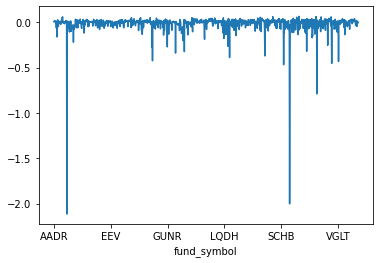

In [122]:
sharpe_ratio.plot()

'/Users/drewhaggerty/Desktop/In_Class_Examples'